In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
df = pd.read_csv('/home/user/Dropbox/z_Toolbox/python/rastert_dem_uni1-clean.txt', sep =" ", header=None)
df_filtrado = df.fillna(0)
#rang_max_colum = float(df_filtrado.shape[1]) ESTO NECESITA MEJORAR. MANUALMENTE SE DEBE ELIMINAR LA ÚLTIMA COLUMNA
df_limpio=df_filtrado.drop(columns=626) #eliminar la última columna  
df_limpio

,0,1,2,3,4,5,6,7,8,9,...,616,617,618,619,620,621,622,623,624,625
0,0.0000,0.0000,0.0000,102.5944,102.4445,102.3538,101.8282,101.4849,101.3721,101.2563,...,143.8118,143.8118,143.8118,143.8118,143.9846,144.0068,144.0079,0.0000,0.0000,0.0000
1,0.0000,102.3538,102.7859,102.9417,102.8715,102.7256,102.5944,102.3894,101.8282,101.5291,...,144.0053,144.0043,143.9955,144.0068,144.0068,144.0418,144.0931,144.0079,143.9846,0.0000
2,0.0000,102.9084,103.2765,103.3518,103.0021,102.9444,102.8623,102.6423,102.4445,101.9948,...,144.0053,144.0043,143.9955,144.0068,144.0079,144.0634,144.1047,144.0634,144.0079,0.0000
3,102.9084,103.2353,103.3563,103.3879,103.2765,103.0021,102.8743,102.7256,102.5945,102.4445,...,144.0053,144.0043,143.9955,144.0068,144.0079,144.0634,144.1047,144.0634,144.0079,143.8335
4,102.9635,103.2353,103.3563,103.3879,103.2797,103.1713,102.9417,102.7898,102.6788,102.5703,...,143.7825,143.7183,143.6372,143.6418,143.7609,143.9846,144.0068,143.9954,143.8335,142.9343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,109.6743,110.3516,110.5246,110.6522,110.4627,110.3296,110.0543,109.8274,109.3619,108.8647,...,129.3015,129.8211,129.8211,129.8211,129.7802,129.7993,129.8211,129.7674,129.6042,129.5118
313,110.3307,110.7865,110.9610,110.9977,110.9158,110.5188,110.3336,110.0543,109.6381,108.9366,...,128.7807,129.0047,129.2082,129.3525,129.5107,129.6042,129.7255,129.6042,129.5239,129.5066
314,0.0000,110.7865,110.9610,110.9977,110.9158,110.5188,110.3296,109.9766,109.3828,108.8096,...,128.4888,128.6588,128.7807,128.9768,129.2072,129.4010,129.5118,129.5066,129.3525,0.0000
315,0.0000,110.5246,110.9610,110.9977,110.9158,110.4627,110.1931,109.8274,109.2321,108.1825,...,127.8752,128.0296,128.3858,128.7807,129.0047,129.0728,129.1743,129.5066,130.0379,130.4836


In [48]:
## línea de visión 
def recta(x_0, y_0, x_1,y_1,x): # todos los puntos son conocidos, la función bota un punto adelante 
    m=(y_1-y_0)/(x_1-x_0)
    recta= y_0+m*(x-x_0)
    
    return recta

def segmentos(array1, array2):  # primero los valores y de la curva
    vect = []
    index = []
    for i in range(0,len(array1)):           
        if (array1-array2)[i] >= 0: #la condicion. 
            vect.append(array1[i])
            index.append(i)
    #    else: 
     #       vect.append(0)
      #      index.append(0)
    return (index, vect)

#### SUPER IMPORTANTE 
def indice_final(inicio, array1, array2):  # genera el index final de intersección 
    for i in range(inicio,len(array1)):           
        if (array1-array2)[i] >= 0: #la condicion. 
            indice_final=i
    return indice_final

#funcion para calcular la distancia entre dos puntos 
# p1 y p2 son array de dos dimensiones  que tiene los puntos (x,y)

def distancia(p1, p2): #la entrada     
    resto = p2**2-p1**2
    dist = math.sqrt(abs(resto[0])+ abs(resto[1]))  
    return dist 

    

In [4]:
#array con los valores de X que depende de el número de celdas que tiene la información GIS 
# el valor real debe salir de df_limpio.shape[1]
#array con los valores de X 
arr_x = np.linspace(0,625,626) #ESTAMOS USANDO EL VALOR 626 DE FORMA MANUAL 


Acá ingresa los valores  de la curva real 

In [102]:
#### IMPORTANTE 
#### IMPORTANTE 
#### IMPORTANTE 
inicio = 407 # indice donde quiero empezar a analizar en el eje X 
punto_inicio=[50,120]# punto desde donde se coloca el observador 
columna = 110
#### IMPORTANTE 
#### IMPORTANTE 
#### IMPORTANTE 


####  Puntos de la curva 
# iloc 110 elige la fila que quiero analizar 


np_array = df_limpio.iloc[columna].to_numpy()
vec_recta= [] 

#esto genera la recta 
for j in range(0,len(arr_x)):        
    tm=recta(punto_inicio[0],punto_inicio[1],arr_x[inicio], np_array[inicio], arr_x[j]) 
    vec_recta.append(tm)
    recta_vec = np.asarray(vec_recta)   
    
#cálculo de la distancia  
lf= indice_final(inicio, np_array, recta_vec) # indice final de intersección  # PUNTO 2 P2

int_i= np.asarray([inicio,np_array[inicio]])#convertir los puntos iniciales en el  array  PUNTO DE INICIO P1
int_f= np.asarray([lf,np_array[lf]])#convertir los puntos finales en el  array 
u = distancia(int_i, int_f) #cacula la distancia 
print(u)
type(u)

52.88448054694304


float

In [132]:
def distancia_recorrida(A, B, C): #A: punto de inicio del análisis, B: posicion_detenctor, C:columna del GIS analizado 
    
    np_array = df_limpio.iloc[C].to_numpy()
    vec_recta= [] 

    #esto genera la recta 
    for j in range(0,len(arr_x)):        
        tm=recta(punto_inicio[0],punto_inicio[1],arr_x[A], np_array[A], arr_x[j]) 
        vec_recta.append(tm)
        recta_vec = np.asarray(vec_recta)   

    #cálculo de la distancia  
    lf= indice_final(A, np_array, recta_vec) # indice final de intersección  # PUNTO 2 P2

    int_i= np.asarray([A,np_array[A]])#convertir los puntos iniciales en el  array  PUNTO DE INICIO P1
    int_f= np.asarray([lf,np_array[lf]])#convertir los puntos finales en el  array 
    u = distancia(int_i, int_f) #cacula la distancia 

    return(u)



In [194]:
def array1d_column(pt_inicio, column): #calcula el vector con los valores de profundad para una columna dada 

    vect_dis = []
    index_dis = []

    for i in range(380, 409): # acá hay que cambiar los límites 
        pop= distancia_recorrida(i, pt_inicio, column)
        #if (pop!=0):        
        vect_dis.append(pop) 
            
    dis_array=np.round(np.array(vect_dis),2) # vector numpy para trabajar a futuro 
    
    return dis_array

#p = np.column_stack((array1d_column([50,120],100)))
p = array1d_column([50,120],100)

for i in range(1,50):     
    l=array1d_column([50,120],100+i)
    p = np.column_stack((p,l))




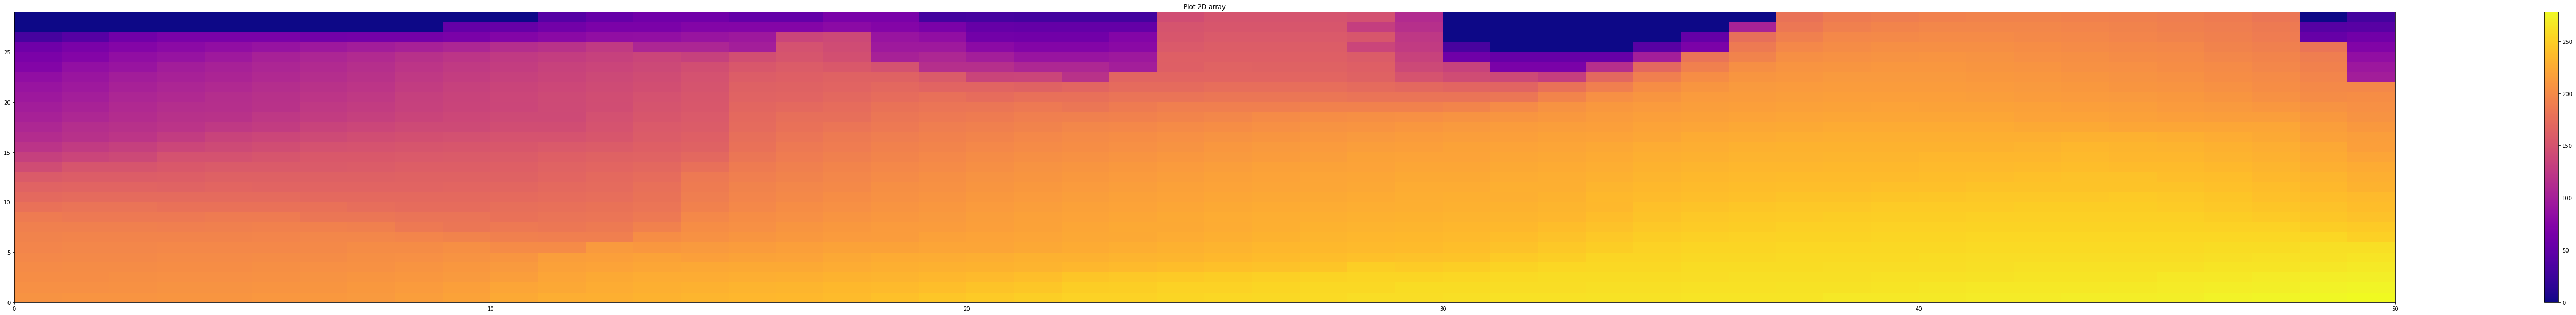

In [198]:


#X=np.random.randint(256, size=(10, 10))
#cada columna se creara en tanto haya mas columans 


fig = plt.figure(figsize=(100,10)) #columnas y filas del array
plt.pcolormesh(p,cmap="plasma")
plt.title("Plot 2D array")
plt.colorbar()
plt.show()


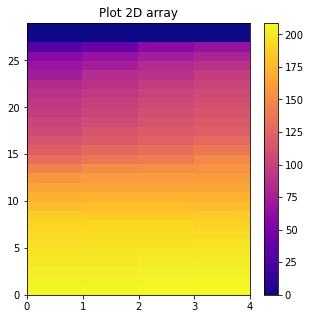

In [206]:
u = array1d_column([50,120],100)
v = array1d_column([50,120],101)
v2 = array1d_column([50,120],102)
v3 = array1d_column([50,120],103)
ip = np.column_stack((u,v,v2,v3))

fig = plt.figure(figsize=(5,5)) #columnas y filas del array
plt.pcolormesh(ip,cmap="plasma")
plt.title("Plot 2D array")
plt.colorbar()
plt.show()
